In [5]:
#import libs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# we using sklearn and Linear Reg for the Prediction

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [6]:
#we going to predict the future spread of the confirmed case

COVID_CONFIRMED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
covid_confirmed = pd.read_csv(COVID_CONFIRMED_URL)

In [7]:
print(covid_confirmed.shape)

(266, 110)


In [8]:
covid_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,736,750,766,773,782,789,795,803,820,832
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,743,743,743,745,745,747,748,750,751,751
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,27,27,27,27,30,35,35,35,36,36


In [9]:
#we convert the wide data to a long one

covid_confirmed_long = pd.melt(covid_confirmed,
                               id_vars=covid_confirmed.iloc[:, :4],
                               var_name='date',
                               value_name='confirmed')

In [10]:
covid_confirmed_long.shape

(28196, 6)

In [11]:
covid_confirmed_long.head()

,Province/State,Country/Region,Lat,Long,date,confirmed
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0


In [12]:
#data cleaning

covid_confirmed_long[['Province/State']] = covid_confirmed_long[['Province/State']].fillna('')
covid_confirmed_long.fillna(0, inplace=True)
covid_confirmed_long.isna().sum().sum()

0

In [13]:
#sort values by Country and date & remove unuseful columns

covid_countries_date_df = covid_confirmed_long.groupby(['Country/Region', 'date'], sort=False).sum().reset_index()
covid_countries_date_df.drop(['Lat', 'Long'], axis=1, inplace=True)

In [14]:
covid_countries_date_df

,Country/Region,date,confirmed
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0
...,...,...,...
19817,Western Sahara,5/6/20,6
19818,Sao Tome and Principe,5/6/20,174
19819,Yemen,5/6/20,25
19820,Comoros,5/6/20,8


In [15]:
#let's take the France

COUNTRY = 'France'

covid_country = covid_countries_date_df[covid_countries_date_df['Country/Region'] == COUNTRY]

covid_country.head()

,Country/Region,date,confirmed
56,France,1/22/20,0
243,France,1/23/20,0
430,France,1/24/20,2
617,France,1/25/20,3
804,France,1/26/20,3


In [16]:
#sum the days from the beginning

days = np.array([i for i in range(len(covid_country['date']))])

days

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105])

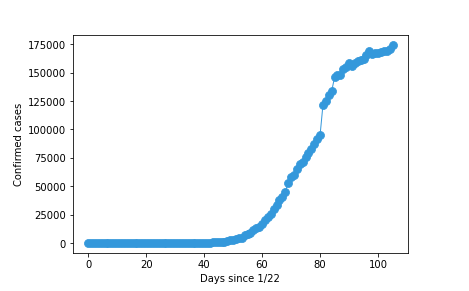

In [17]:
#plot it 

days = np.array([i for i in range(len(covid_country['date']))])

sns.lineplot(x=days, y=covid_country['confirmed'],
             markeredgecolor="#3498db", markerfacecolor="#3498db", markersize=8, marker="o",
             sort=False, linewidth=1, color="#3498db")

plt.suptitle(f"COVID-19 confirmed cases in {COUNTRY} over the time", fontsize=16, fontweight='bold', color='white')

plt.ylabel('Confirmed cases')
plt.xlabel('Days since 1/22')

plt.show()


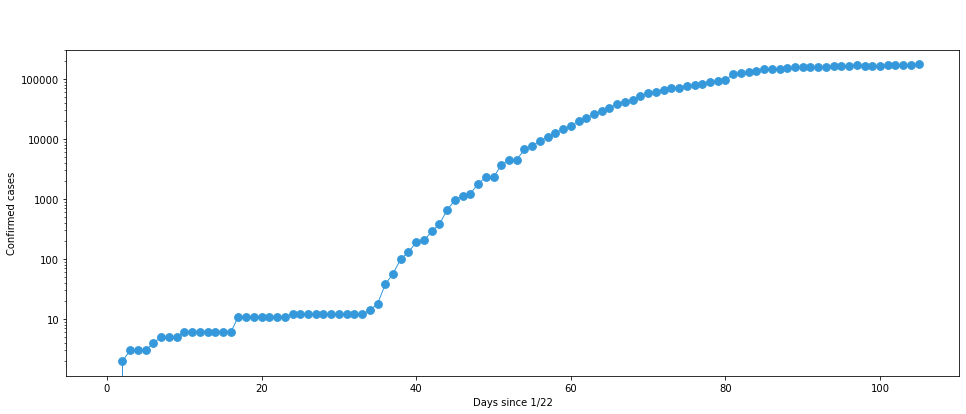

In [18]:
#plot the same but using logarithmic scale

fig, ax = plt.subplots(figsize=(16, 6))

ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))
plt.title("(logarithmic scale)", color='white')

sns.lineplot(x=days, y=covid_country['confirmed'],
             markeredgecolor="#3498db", markerfacecolor="#3498db", markersize=8, marker="o",
             sort=False, linewidth=1, color="#3498db")

plt.suptitle(f"COVID-19 confirmed cases in {COUNTRY} over the time", fontsize=16, fontweight='bold', color='white')

plt.ylabel('Confirmed cases')
plt.xlabel('Days since 1/22')

plt.show()

In [19]:
# skip some unuseful days

SKIP_DAYS = 30

covid_country_confirmed_sm = list(covid_country['confirmed'][SKIP_DAYS:])

covid_country_confirmed_sm[:60]


[12,
 12,
 12,
 12,
 14,
 18,
 38,
 57,
 100,
 130,
 191,
 204,
 288,
 380,
 656,
 959,
 1136,
 1219,
 1794,
 2293,
 2293,
 3681,
 4496,
 4532,
 6683,
 7715,
 9124,
 10970,
 12758,
 14463,
 16243,
 20123,
 22622,
 25600,
 29551,
 33402,
 38105,
 40708,
 45170,
 52827,
 57749,
 59929,
 65202,
 69500,
 71412,
 75343,
 79163,
 83057,
 87366,
 91738,
 94863,
 121712,
 125394,
 130365,
 133585,
 146075,
 148084,
 148086,
 153011,
 155393]

In [20]:
# x will be the days and y the confirdmed cases

X = days[SKIP_DAYS:].reshape(-1, 1)

X

array([[ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
       [ 72],
       [ 73],
       [ 74],
       [ 75],
       [ 76],
       [ 77],
       [ 78],
       [ 79],
       [ 80],
       [ 81],
       [ 82],
       [ 83],
       [ 84],
       [ 85],
       [ 86],
       [ 87],
       [ 88],
       [ 89],
       [ 90],
       [ 91],
       [ 92],
       [ 93],
       [ 94],
       [ 95],
       [ 96],
       [ 97],
       [ 98],
       [ 99],
       [100],
      

In [21]:
y = list(np.log(covid_country_confirmed_sm))

y

[2.4849066497880004,
 2.4849066497880004,
 2.4849066497880004,
 2.4849066497880004,
 2.6390573296152584,
 2.8903717578961645,
 3.6375861597263857,
 4.04305126783455,
 4.605170185988092,
 4.867534450455582,
 5.25227342804663,
 5.318119993844216,
 5.662960480135946,
 5.940171252720432,
 6.486160788944089,
 6.8658910748834385,
 7.035268599281097,
 7.105786129481271,
 7.492203042618741,
 7.737616282857904,
 7.737616282857904,
 8.210939733379021,
 8.410943391573527,
 8.418918622147897,
 8.80732226751107,
 8.950921764797261,
 9.11866358340428,
 9.302919553269277,
 9.4539138048019,
 9.579348943073732,
 9.695417325719395,
 9.909618718466369,
 10.026678163091326,
 10.150347630467653,
 10.293872863209199,
 10.416371057411563,
 10.548100786100218,
 10.614179912311823,
 10.71818842864865,
 10.874777702628888,
 10.9638613122168,
 11.000915807179194,
 11.085245422290907,
 11.149082031552883,
 11.176221201432853,
 11.229806299938259,
 11.279264296926641,
 11.32728239806388,
 11.37786146993896,
 11.42

In [22]:
# split our data so that we can have a train & test data

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    shuffle=False)

In [23]:
#create linear regression model
#train our model thank to the fit() method

linear_model = LinearRegression(fit_intercept=True)

linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
#use the model for prediction

y_pred = linear_model.predict(X_test)

y_pred

array([14.05178436, 14.1970238 , 14.34226323, 14.48750267, 14.6327421 ,
       14.77798154, 14.92322097, 15.06846041])

In [25]:
#evaluation of the model

print('MAE:', mean_absolute_error(y_pred, y_test))
print('MSE:',mean_squared_error(y_pred, y_test))

MAE: 2.52175862789786
MSE: 6.461864849484044


In [26]:
#linear regression formula : y = ax + b

a = linear_model.coef_
b = linear_model.intercept_


In [27]:
#predict the next 30 days

X_fore = list(np.arange(len(days), len(days) + 30))
y_fore = [(a*x+b)[0] for x in X_fore]

X_fore, y_fore

([106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135],
 [15.213699843839066,
  15.35893927878993,
  15.504178713740792,
  15.649418148691655,
  15.794657583642518,
  15.93989701859338,
  16.085136453544244,
  16.230375888495104,
  16.37561532344597,
  16.52085475839683,
  16.666094193347696,
  16.811333628298556,
  16.956573063249422,
  17.10181249820028,
  17.24705193315115,
  17.392291368102008,
  17.537530803052867,
  17.682770238003734,
  17.828009672954593,
  17.97324910790546,
  18.11848854285632,
  18.263727977807186,
  18.408967412758045,
  18.55420684770891,
  18.69944628265977,
  18.844685717610638,
  18.989925152561497,
  19.135164587512364,
  19.280404022463223,
  19.42564345741409])

In [28]:
#go back to linear data in order to interpret it better

y_train_l = list(np.exp(y_train))
y_test_l = list(np.exp(y_test))
y_pred_l = list(np.exp(y_pred))
y_fore_l = list(np.exp(y_fore))

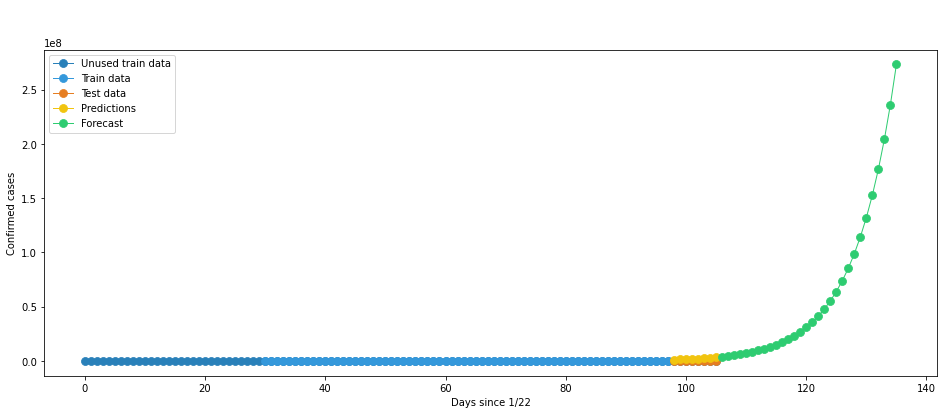

In [45]:
#plot it 

fig, ax = plt.subplots(figsize=(16, 6))

sns.lineplot(x=days, y=covid_country['confirmed'],
             markeredgecolor="#2980b9", markerfacecolor="#2980b9", markersize=8, marker="o",
             sort=False, linewidth=1, color="#2980b9")

sns.lineplot(x=X_train.reshape(-1), y=y_train_l,
             markeredgecolor="#3498db", markerfacecolor="#3498db", markersize=8, marker="o",
             sort=False, linewidth=1, color="#3498db")

sns.lineplot(x=X_test.reshape(-1), y=y_test_l,
             markeredgecolor="#e67e22", markerfacecolor="#e67e22", markersize=8, marker="o",
             sort=False, linewidth=1, color="#e67e22")

sns.lineplot(x=X_test.reshape(-1), y=y_pred_l,
             markeredgecolor="#f1c40f", markerfacecolor="#f1c40f", markersize=8, marker="o",
             sort=False, linewidth=1, color="#f1c40f")

sns.lineplot(x=X_fore, y=y_fore_l,
             markeredgecolor="#2ecc71", markerfacecolor="#2ecc71", markersize=8, marker="o",
             sort=False, linewidth=1, color="#2ecc71")

plt.suptitle(f"COVID-19 confirmed cases and forecasting in {COUNTRY} over the time", fontsize=16, fontweight='bold', color='white')

plt.ylabel('Confirmed cases')
plt.xlabel('Days since 1/22')
plt.legend(['Unused train data', 'Train data', 'Test data', 'Predictions', 'Forecast'])
plt.savefig('reg.svg', format='svg', dpi=1200)
plt.show()

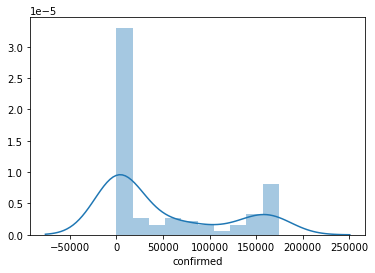

In [50]:
sns.distplot(covid_country['confirmed'], bins=10)